In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome() #爬虫常用chrome,也会用edge 
# webdriver.Chrome()允许开发人员通过编程方式控制和操作 Chrome 浏览器

url='https://esf.fang.com/'
driver.get(url) # 让浏览器打开指定网页

# find_element(By.XPATH, )：用XPATH定位页面元素
# XPATH /html/body/div[5]/img[1] ：html → body → 第5个div → 第1个img   是右键直接复制下来的完整路径
# .click()：点击该元素（关闭广告）


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [16]:
# 点击昌平
driver.find_element(By.XPATH, '/html/body/div[4]/div[3]/div[2]/div[1]/ul/li[1]/ul/li[6]/a').click()  

In [26]:
# 点击沙河
driver.find_element(By.XPATH, '/html/body/div[4]/div[3]/div[2]/div[1]/ul/li[2]/ul/li[11]/a').click()  

In [ ]:
try:
    next_page=driver.find_element('class name','last')     #先尝试翻页
    next_page.click()
except NoSuchElementException:
    print("NoSuchElementException") 

In [27]:
from selenium.webdriver.support.ui import WebDriverWait
import time
'''
EC: expected_conditions，"预期条件"。Selenium 中的模块，定义各种等待条件。
告诉浏览器"等到某个特定条件满足后再继续执行"

properties 是一个列表，包含当前页面的所有房源元素
properties = [
    <WebElement1>,  # 第一个房子的dl元素
    <WebElement2>,  # 第二个房子的dl元素  
    <WebElement3>,  # 第三个房子的dl元素
    ...
    <WebElement20>  # 第二十个房子的dl元素
]
'''
all_properties_data = []
# 显式等待，最多10秒
wait = WebDriverWait(driver, 10)

# 爬取前20页数据
max_pages = 20
current_page = 1

while current_page <= max_pages:
    print(f"正在爬取第 {current_page} 页...")
    
    # 等待房源列表加载
    # 不加等待的写法element = driver.find_element(By.CLASS_NAME, "shop_list")  
    property_list = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "shop_list")))
    
    # 找到所有房源元素
    # 选择所有class包含"clearfix"的dl元素，每个房子都在<dl   dl>块里，class叫clearfix
    properties = property_list.find_elements(By.CSS_SELECTOR, "dl.clearfix")
    
    print(f"第 {current_page} 页找到 {len(properties)} 套房源")
    
    # 提取每个房源的文字信息
    for property_element in properties:
        try:
            # 获取整个房源块的纯文本内容
            property_text = property_element.text
            all_properties_data.append([property_text])
        except Exception as e:
            print(f"提取房源信息时出错: {e}")
            continue
    
    # 翻页逻辑
    if current_page < max_pages:
        try:
            next_button = driver.find_element(By.LINK_TEXT, "下一页") # 寻找文字内容完全等于"下一页"的链接元素
            
            # 检查是否已是最后一页
            if "disable" in next_button.get_attribute("class"):
                # 通常网站会在最后一页时给下一页按钮加"disable"、"disabled"等类名
                print("已是最后一页，爬取结束")
                break
            
            # 点击下一页   arguments[0]代表传入的第一个参数（next_button）
            driver.execute_script("arguments[0].click();", next_button)
            print(f"翻到第 {current_page + 1} 页...")
            time.sleep(2)  # 等待页面加载
            
            current_page += 1
            
        except NoSuchElementException:
            print("未找到下一页按钮，爬取结束")
            break
        except Exception as e:
            print(f"翻页时出错: {e}")
            break
    else:
        print(f"已完成 {max_pages} 页爬取")
        break

# 关闭浏览器
#river.quit()

正在爬取第 1 页...
第 1 页找到 60 套房源
翻到第 2 页...
正在爬取第 2 页...
第 2 页找到 60 套房源
翻到第 3 页...
正在爬取第 3 页...
第 3 页找到 60 套房源
翻到第 4 页...
正在爬取第 4 页...
第 4 页找到 60 套房源
翻到第 5 页...
正在爬取第 5 页...
第 5 页找到 60 套房源
翻到第 6 页...
正在爬取第 6 页...
第 6 页找到 60 套房源
翻到第 7 页...
正在爬取第 7 页...
第 7 页找到 60 套房源
翻到第 8 页...
正在爬取第 8 页...
第 8 页找到 60 套房源
翻到第 9 页...
正在爬取第 9 页...
第 9 页找到 60 套房源
翻到第 10 页...
正在爬取第 10 页...
第 10 页找到 60 套房源
翻到第 11 页...
正在爬取第 11 页...
第 11 页找到 60 套房源
翻到第 12 页...
正在爬取第 12 页...
第 12 页找到 60 套房源
翻到第 13 页...
正在爬取第 13 页...
第 13 页找到 60 套房源
翻到第 14 页...
正在爬取第 14 页...
第 14 页找到 60 套房源
翻到第 15 页...
正在爬取第 15 页...
第 15 页找到 60 套房源
翻到第 16 页...
正在爬取第 16 页...
第 16 页找到 60 套房源
翻到第 17 页...
正在爬取第 17 页...
第 17 页找到 60 套房源
翻到第 18 页...
正在爬取第 18 页...
第 18 页找到 60 套房源
翻到第 19 页...
正在爬取第 19 页...
第 19 页找到 60 套房源
翻到第 20 页...
正在爬取第 20 页...
第 20 页找到 60 套房源
已完成 20 页爬取


In [ ]:
# 保存数据
if all_properties_data:
    df = pd.DataFrame(all_properties_data, columns=["房源信息"])
    df.to_csv("房天下房源数据.csv", index=False, encoding='utf_8_sig')
    print(f"爬取完成！共获取 {len(df)} 条房源信息，已保存至 '房天下房源数据.csv'")
    
    # 显示前几行数据
    print("\n数据预览:")
    print(df.head(11))
else:
    print("未爬取到任何数据")

爬取完成！共获取 1200 条房源信息，已保存至 '房天下房源数据.csv'

数据预览:
                             房源信息
0   沙河·中海尚湖世家·7室·3厅,可按电梯,精装修,有...
1   地铁沙河高教园站,总高4层花园洋房,国企开发,住总清...
2   地铁沙河高教园站,总高4层花园洋房,国企开发,住总清...
3   国企开发,精装修洋房,紧邻高教园地铁站,高使用率,配...
4   龙湖开发观萃,中关村生命科學园地铁站 第四代高科技住...
5   京北新盘,均价4万,127.9平精装两居室\n4室2...
6   龙湖开发观翠,中关村生命科學园地铁站 第四代高科技住...
7   龙湖开发观萃,中关村生命科學园地铁站 第四代高科技住...
8   中海尚湖世家把边位置 600w装修 2017年装修 ...
9   中海尚湖世家6室3厅精装修\n独栋| 卧室：6个 |...
10  地铁沙河高教园站,总高4层花园洋房,国企开发,住总清...


In [ ]:
if all_properties_data:
    import re
    
    extracted_data = [] 
    
    for property_info in all_properties_data:
        try:
            text = property_info[0]
            
            # 用正则表达式提取
            property_name = ""
            total_area = ""
            total_price = ""
            unit_price = ""
            
            # 1. 提取房产名字（从文本开头找到第一个逗号，逗号前的内容）
            # eg:沙河·中海尚湖世家·7室·3厅,可按电梯,精装修--->沙河·中海尚湖世家·7室·3厅
            lines = [line.strip() for line in text.split('\n') if line.strip()]
            first_line = lines[0]

# r'...'：原始字符串    ^匹配字符串开头  ()把匹配的内容保存起来  
            first_comma_match = re.search(r'^([^，,]+)[，,]', first_line)
            # ()保存的内容是房产名字[^，,]：^表示"非"，匹配不是逗号的任何字符
            # [，,]：匹配一个中文逗号或英文逗号,前面的是房产名字

            if first_comma_match: # first_comma_match.group(1)：获取第一个()的内容
                property_name = first_comma_match.group(1).strip() # .strip()：去除首尾的空白字符
            else:
                # 如果没有逗号，找"|"前的内容
                if "|" in text:
                    # 找到第一个"|"的位置，取前面的内容
                    pipe_index = first_line.find("|")
                    property_name = first_line[:pipe_index].strip()
                    # 如果获取的内容太长，限制长度
                    if len(property_name) > 40:
                        property_name = property_name[:40]
                else:
                    # 如果也没有"|"，直接取第一行
                    property_name = first_line[:15]  # 限制长度
            
            # 2. 提取总面积:找到 "数字.数字 ㎡" or "数字㎡" 的模式
            area_match = re.search(r'(\d+\.?\d*)\s*㎡', text) 
            # \d+：匹配1个或多个数字
            # \.?：匹配0个或1个小数点
            # \d*：匹配0个或多个数字
            # \s*：匹配0个或多个空白字符
            if area_match:
                total_area = area_match.group(1)
            
            # 3. 提取总价格（数字+万，且前面没有"元"），且数字必须大于15
            total_price = None
            all_price_matches = re.findall(r'(\d+\.?\d*)\s*万(?!元)', text)
            # (?!元)：确保"万"后面不是"元"--->避免把单价"40150元/㎡"误认为总价"40150万"
            for match in all_price_matches:
                price_val = float(match)
                if price_val > 15:
                    total_price = price_val
                    break  # 找到第一个大于15的价格就停止
            
            # 4. 提取单价（数字+元/㎡）
            unit_match = re.search(r'(\d+\.?\d*)\s*元/㎡', text)
            if unit_match:
                unit_price = unit_match.group(1)
            
            extracted_data.append([property_name, total_area, total_price, unit_price])
            
        except Exception as e:
            print(f"处理房源信息时出错: {e}")
            extracted_data.append(["", "", "", ""])
            continue
    
    # 创建DataFrame
    df = pd.DataFrame(extracted_data, columns=["房产名称", "总面积(㎡)", "总价格(万)", "单价(元/㎡)"])
    
    # 清洗 保留至少有一个字段不为空的所有行
    df_clean = df[(df["房产名称"] != "") | (df["总面积(㎡)"] != "") | (df["总价格(万)"] != "")]
    
    # 保存数据
    df_clean.to_csv("买房天通苑.csv", index=False, encoding='utf_8_sig')
    print(f"爬取完成！共获取 {len(df_clean)} 条有效房源信息")
    
    # 显示详细信息
    print("\n数据预览（前10条）:")
    pd.set_option('display.max_colwidth', 30)  # 设置显示宽度
    print(df_clean.head(10))
    
else:
    print("未爬取到任何数据")

爬取完成！共获取 1200 条有效房源信息

数据预览（前10条）:
                            房产名称  总面积(㎡)  总价格(万) 单价(元/㎡)
0                       地铁沙河高教园站     125   587.0   46960
1                           国企开发     127   689.0   54251
2                       地铁沙河高教园站      99   462.0   46666
3                           京北新盘   127.9   449.0   35105
4                         龙湖开发观萃     129   779.0   60387
5                         龙湖开发观翠      95   485.0   51052
6                         龙湖开发观萃     118   659.0   55847
7  中海尚湖世家 600w装修 坐北朝南5间卧室价格可谈看房随  559.89  2660.0   47509
8  碧水庄园3期 5间卧室占地2200 室内8米调控客厅 带装     559  4200.0   75134
9  碧水庄园3期 湖边大宅 占地3000 带电梯 9米挑空南客  758.88  5800.0   76428


# 爬取租房数据

In [42]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome() 

url='https://zu.fang.com/'
driver.get(url) # 让浏览器打开指定网页

In [43]:
# 点击昌平
driver.find_element(By.XPATH, '/html/body/div[4]/div[2]/div[2]/div/dl[1]/dd/a[7]').click()  
# 点击沙河
driver.find_element(By.XPATH, '/html/body/div[4]/div[2]/div[2]/div[1]/div/a[13]').click()  

In [ ]:
import pandas as pd
import time

# 存储所有租房数据
all_rental_data = []

# 最大爬取页数
max_pages = 20
current_page = 1

print("开始爬取租房数据...")

# 开始循环爬取每一页
while current_page <= max_pages:
    print(f"正在爬取第 {current_page} 页...")
    
    # 等待房源列表加载完成
    wait = WebDriverWait(driver, 10)
    house_list = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'houseList')))
    
    # 找到当前页的所有房子（每个dl就是一个房子）
    houses = house_list.find_elements(By.TAG_NAME, 'dl')
    print(f"第 {current_page} 页找到 {len(houses)} 个房源")
    
    # 遍历当前页的每一个房子
    for i, house in enumerate(houses):
        try:
            # 提取房子的文本信息
            house_text = house.text
            
            # 将数据添加到列表
            all_rental_data.append([house_text])
            
        except Exception as e:
            print(f"  提取第 {i+1} 个房源时出错: {e}")
            continue
    
    # 翻页
    if current_page < max_pages:
        try:
            # 查找下一页按钮
            next_button = driver.find_element(By.LINK_TEXT, "下一页")
            
            # 检查是否已经是最后一页
            if "disable" in next_button.get_attribute("class"):
                print("已经是最后一页，爬取结束")
                break
            
            # 点击下一页
            print("点击下一页...")
            next_button.click()
            
            # 等待新页面加载
            time.sleep(3)
            
            # 页码增加
            current_page += 1
            
        except NoSuchElementException:
            print("找不到下一页按钮，爬取结束")
            break
        except Exception as e:
            print(f"翻页时出错: {e}")
            break
    else:
        print(f"已完成 {max_pages} 页爬取")
        break

print("爬取完成！")

# 保存数据到CSV文件
if all_rental_data:
    # 创建DataFrame
    df = pd.DataFrame(all_rental_data, columns=["租房信息"])
    
    # 保存文件
    df.to_csv("房天下沙河租房数据.csv", index=False, encoding='utf_8_sig')
    print(f"数据已保存！共爬取 {len(df)} 条租房信息")
    
    # 显示数据预览
    print("\n数据预览：")
    print(df.head())
else:
    print("没有爬取到任何数据")

# 关闭浏览器
# driver.quit()
# print("浏览器已关闭")

开始爬取租房数据...
正在爬取第 1 页...
第 1 页找到 60 个房源
点击下一页...
正在爬取第 2 页...
第 2 页找到 60 个房源
点击下一页...
正在爬取第 3 页...
第 3 页找到 60 个房源
点击下一页...
正在爬取第 4 页...
第 4 页找到 60 个房源
点击下一页...
正在爬取第 5 页...
第 5 页找到 60 个房源
点击下一页...
正在爬取第 6 页...
第 6 页找到 60 个房源
点击下一页...
正在爬取第 7 页...
第 7 页找到 60 个房源
点击下一页...
正在爬取第 8 页...
第 8 页找到 60 个房源
点击下一页...
正在爬取第 9 页...
第 9 页找到 60 个房源
点击下一页...
正在爬取第 10 页...
第 10 页找到 60 个房源
点击下一页...
正在爬取第 11 页...
第 11 页找到 60 个房源
点击下一页...
正在爬取第 12 页...
第 12 页找到 60 个房源
点击下一页...
正在爬取第 13 页...
第 13 页找到 60 个房源
点击下一页...
正在爬取第 14 页...
第 14 页找到 60 个房源
点击下一页...
正在爬取第 15 页...
第 15 页找到 60 个房源
点击下一页...
正在爬取第 16 页...
第 16 页找到 60 个房源
点击下一页...
正在爬取第 17 页...
第 17 页找到 60 个房源
点击下一页...
正在爬取第 18 页...
第 18 页找到 60 个房源
点击下一页...
正在爬取第 19 页...
第 19 页找到 60 个房源
点击下一页...
正在爬取第 20 页...
第 20 页找到 60 个房源
已完成 20 页爬取
爬取完成！
数据已保存！共爬取 1200 条租房信息

数据预览：
                            租房信息
0  正南 北京玫瑰园 6室3厅 精装修\n整租|6室3厅...
1  碧水庄园 优质小区南入院独栋出租\n整租|7室2厅|...
2  北京玫瑰园5室3厅精装修\n整租|5室3厅|233㎡...
3  碧水庄园A区精装独栋出租\n整租|5室1厅|375㎡...
4  兆丰家园:醇熟社区宜居境,近享便利漫享生活。

In [ ]:
# 提取有用的数据
extracted_data = []
import re

print("开始处理提取数据...")

for i, rental_info in enumerate(all_rental_data):
    try:
        text = rental_info[0]
        
        # 初始化字段
        property_name = ""
        total_area = ""
        monthly_rent = ""
        
        # 1. 名称：第一行的前五个字
        lines = text.split('\n')
        if lines:
            first_line = lines[0].strip()
            # 正则匹配前五个中文字符
            chinese_chars = re.findall(r'[\u4e00-\u9fa5]', first_line)
            if len(chinese_chars) >= 5:
                property_name = ''.join(chinese_chars[:5])
            else:
                property_name = first_line[:5] if len(first_line) >= 5 else first_line
        
        # 2. 提取房屋总面积：匹配数字+㎡
        area_match = re.search(r'(\d+\.?\d*)\s*㎡', text)
        if area_match:
            total_area = area_match.group(1)
        
        # 3. 提取月租金：正则匹配数字+元/月
        rent_match = re.search(r'(\d+\.?\d*)\s*元/月', text)
        if rent_match:
            monthly_rent = rent_match.group(1)
        
        extracted_data.append([property_name, total_area, monthly_rent])
        
    except Exception as e:
        print(f"处理第 {i+1} 条数据时出错: {e}")
        extracted_data.append(["", "", ""])
        continue
print("数据提取完成！")

# 创建DataFrame并保存
if extracted_data:
    df = pd.DataFrame(extracted_data, columns=["名称", "面积(㎡)", "月租金(元)"])
    
    # 数据清洗：移除完全空白的行
    df_clean = df[(df["名称"] != "") | (df["面积(㎡)"] != "") | (df["月租金(元)"] != "")]
    
    # 保存到CSV文件
    df_clean.to_csv("房天下租房提取数据.csv", index=False, encoding='utf_8_sig')
    
    print(f"\n数据处理完成！")
    print(f"原始数据条数: {len(all_rental_data)}")
    print(f"有效数据条数: {len(df_clean)}")
    
    # 预览
    print("\n数据预览:")
    print(df_clean.head(10))
    
else:
    print("没有提取到任何有效数据")

开始处理提取数据...
数据提取完成！

数据处理完成！
原始数据条数: 1200
有效数据条数: 1200

数据预览:
      名称 面积(㎡) 月租金(元)
0  正南北京玫   475  50000
1  碧水庄园优   570  50000
2  北京玫瑰园   233  22000
3  碧水庄园区   375  23000
4  兆丰家园醇    86   3800
5  北京玫瑰园   271  17000
6  北街家园六    61   3500
7  巩华家园南    86   4300
8  亲还在辛苦    65   2500
9  兆丰家园东    76   1700


# 处理数据

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
buy_df = pd.read_csv('买房沙河.csv', delimiter=',')
rent_df = pd.read_csv('租房沙河.csv', delimiter=',')

In [26]:
# 读取三个区域的数据
buy_df1 = pd.read_csv('买房霍营.csv', delimiter=',')
buy_df2 = pd.read_csv('买房回龙观.csv', delimiter=',')
buy_df3 = pd.read_csv('买房天通苑.csv', delimiter=',')

rent_df1 = pd.read_csv('霍营租房.csv', delimiter=',')
rent_df2 = pd.read_csv('回龙观租房.csv', delimiter=',')
rent_df3 = pd.read_csv('天通苑租房.csv', delimiter=',')

## 买房描述性统计

In [27]:
# 沙河
print(f"\n{"买房"}数据描述:")
print(buy_df.describe())
# top代表出现频率最高的值，freq为出现次数
print(f"\n数据类型:")
print(buy_df.dtypes)


买房数据描述:
            总面积(㎡)        总价格(万)        单价(元/㎡)
count  1200.000000   1200.000000    1200.000000
mean    318.474625   1949.447167   53937.589167
std     262.642858   2001.909614   24611.011790
min      25.440000     30.000000   15000.000000
25%      88.000000    310.000000   36349.000000
50%     271.050000   1450.000000   45247.000000
75%     469.662500   2750.000000   66477.000000
max    2535.000000  12800.000000  135262.000000

数据类型:
房产名称        object
总面积(㎡)     float64
总价格(万)     float64
单价(元/㎡)      int64
dtype: object


In [5]:
# 霍营数据描述
print(f"\n霍营数据描述:")
print(buy_df1.describe())
print(f"\n霍营数据类型:")
print(buy_df1.dtypes)

# 回龙观数据描述
print(f"\n回龙观数据描述:")
print(buy_df2.describe())
print(f"\n回龙观数据类型:")
print(buy_df2.dtypes)

# 天通苑数据描述
print(f"\n天通苑数据描述:")
print(buy_df3.describe())
print(f"\n天通苑数据类型:")
print(buy_df3.dtypes)


霍营数据描述:
           总面积(㎡)       总价格(万)       单价(元/㎡)
count  456.000000   456.000000    456.000000
mean    97.340987   407.126469  42220.642544
std     42.371718   214.132962  10299.002038
min     34.840000    24.000000  16510.000000
25%     71.280000   269.000000  36018.750000
50%     89.020000   350.000000  40948.500000
75%    106.540000   495.000000  47478.250000
max    311.880000  1550.000000  67640.000000

霍营数据类型:
房产名称        object
总面积(㎡)     float64
总价格(万)     float64
单价(元/㎡)      int64
dtype: object

回龙观数据描述:
            总面积(㎡)        总价格(万)        单价(元/㎡)
count  1200.000000   1200.000000    1200.000000
mean    125.944842    552.416167   41980.496667
std      93.534591    566.339831   12305.862934
min      33.000000     40.000000   18333.000000
25%      84.885000    320.000000   32950.500000
50%     101.300000    419.500000   39984.000000
75%     131.145000    598.000000   49738.000000
max    1888.000000  11000.000000  141174.000000

回龙观数据类型:
房产名称        object
总面积(㎡)     float

### 买房异常值检测

In [14]:
def detect_outliers(df, name):
    print(f"\n{name}数据异常值检测:")
    # 从 df 中选择所有数值型列int\float 后面的.columns：取出这些列名
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25) #25% 分位点
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 #四分位距
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if not outliers.empty:
            print(f"\n{col}列异常值 ({len(outliers)}个):")
            print(f"异常值范围: <{lower_bound:.2f} 或 >{upper_bound:.2f}")
            print(outliers[[col]])
        else:
            print(f"\n{col}列无异常值")

detect_outliers(buy_df, "买房沙河")


买房沙河数据异常值检测:

总面积(㎡)列异常值 (9个):
异常值范围: <-484.49 或 >1042.16
       总面积(㎡)
172   2350.00
196   2350.00
420   2535.00
502   1300.00
553   1209.32
651   1208.98
700   1500.00
1024  1208.98
1100  1095.00

总价格(万)列异常值 (39个):
异常值范围: <-3350.00 或 >6410.00
       总价格(万)
8      8000.0
108    7500.0
119    7500.0
172    8000.0
196    8000.0
404    6500.0
458    7000.0
486    8999.0
502    8000.0
544    6450.0
555    8999.0
605   12800.0
619   12800.0
628    7500.0
645   12800.0
667    9500.0
685    7500.0
700    8500.0
737    6800.0
746    7500.0
792    8500.0
839    7600.0
871    7500.0
877    9500.0
879    7600.0
897    7500.0
900    6800.0
913    8000.0
943    7500.0
952    7500.0
966    9500.0
978    8000.0
997    8000.0
1009   6800.0
1013   6900.0
1035   9500.0
1056   8999.0
1180   7500.0
1198   7500.0

单价(元/㎡)列异常值 (50个):
异常值范围: <-8843.00 或 >111669.00
      单价(元/㎡)
28     130573
32     114627
119    126281
159    117297
227    117440
252    126574
317    117440
337    117297
384    117440
405 

In [15]:
detect_outliers(buy_df1, "买房霍营")
detect_outliers(buy_df2, "买房回龙观")
detect_outliers(buy_df3, "买房天通苑")


买房霍营数据异常值检测:

总面积(㎡)列异常值 (40个):
异常值范围: <18.39 或 >159.43
     总面积(㎡)
30   167.31
34   311.88
35   162.03
61   162.03
93   311.88
100  167.31
104  167.31
109  246.61
152  164.73
187  180.23
188  167.31
190  180.65
196  303.83
200  180.23
209  164.73
224  167.06
234  215.21
248  303.83
264  159.71
265  167.31
272  164.73
283  181.95
285  215.21
296  167.31
303  167.06
304  180.23
305  303.83
306  211.62
312  215.21
317  219.63
365  215.21
368  219.63
380  215.21
394  167.06
404  159.71
405  168.65
418  180.65
422  226.74
444  212.21
445  167.06

总价格(万)列异常值 (25个):
异常值范围: <-70.00 或 >834.00
      总价格(万)
1     935.00
3     929.00
22    920.00
34    909.00
35    880.00
56    929.00
61    880.00
63    930.00
69    929.97
81    899.00
93    909.00
94    929.00
98    920.00
109  1550.00
196   998.00
248   998.00
285  1150.00
305   998.00
312  1180.00
317  1280.00
347   880.00
365  1180.00
368  1280.00
387   880.00
444  1200.00

单价(元/㎡)列异常值 (16个):
异常值范围: <18829.50 或 >64667.50
     单价(元/㎡)
1      

## 租房描述性统计

In [16]:
print(f"\n{"租房"}数据描述:")
print(rent_df.describe())
print(f"\n数据类型:")
print(rent_df.dtypes)


租房数据描述:
             面积(㎡)         月租金(元)
count  1200.000000    1200.000000
mean    120.553650    6049.033333
std     329.745875   11825.097039
min       8.000000     800.000000
25%      60.000000    3000.000000
50%      80.000000    3600.000000
75%      90.000000    4300.000000
max    6892.000000  120000.000000

数据类型:
名称         object
面积(㎡)     float64
月租金(元)      int64
dtype: object


In [28]:
# 霍营数据描述
print(f"\n霍营数据描述:")
print(rent_df1.describe())
print(f"\n霍营数据类型:")
print(rent_df1.dtypes)

# 回龙观数据描述
print(f"\n回龙观数据描述:")
print(rent_df2.describe())
print(f"\n回龙观数据类型:")
print(rent_df2.dtypes)

# 天通苑数据描述
print(f"\n天通苑数据描述:")
print(rent_df3.describe())
print(f"\n天通苑数据类型:")
print(rent_df3.dtypes)


霍营数据描述:
               面积            价格
count  643.000000    643.000000
mean    67.878694   4922.227061
std     34.536236   2020.736255
min      6.000000   1000.000000
25%     49.000000   4300.000000
50%     71.000000   5200.000000
75%     89.000000   5945.000000
max    174.000000  16000.000000

霍营数据类型:
名称    object
面积     int64
价格     int64
dtype: object

回龙观数据描述:
                面积            价格
count  2590.000000   2590.000000
mean     80.647104   5753.949421
std      43.148255   2508.265360
min       7.000000   1000.000000
25%      54.000000   4800.000000
50%      87.000000   5850.000000
75%     100.000000   6800.000000
max     680.000000  28000.000000

回龙观数据类型:
名称    object
面积     int64
价格     int64
dtype: object

天通苑数据描述:
                面积            价格
count  1720.000000   1720.000000
mean     83.677907   4956.569186
std      52.593481   2557.220907
min       6.000000   1000.000000
25%      30.000000   2700.000000
50%      89.000000   5200.000000
75%     112.000000   6000.0000

### 租房异常值检测

In [29]:
def detect_outliers(df, name):
    print(f"\n{name}数据异常值检测:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if not outliers.empty:
            print(f"\n{col}列异常值 ({len(outliers)}个):")
            print(f"异常值范围: <{lower_bound:.2f} 或 >{upper_bound:.2f}")
            print(outliers[[col]])
        else:
            print(f"\n{col}列无异常值")

detect_outliers(rent_df, "租房")


租房数据异常值检测:

面积(㎡)列异常值 (132个):
异常值范围: <15.00 或 >135.00
       面积(㎡)
0      475.0
1      570.0
2      233.0
3      375.0
5      271.0
...      ...
1098  3200.0
1135    14.0
1138   138.0
1167   165.0
1172   252.0

[132 rows x 1 columns]

月租金(元)列异常值 (118个):
异常值范围: <1050.00 或 >6250.00
      月租金(元)
0      50000
1      50000
2      22000
3      23000
5      17000
...      ...
1165    1000
1167    9000
1172   12000
1176     800
1181    6500

[118 rows x 1 columns]


In [30]:
detect_outliers(rent_df1, "霍营租房")
detect_outliers(rent_df2, "回龙观租房")
detect_outliers(rent_df3, "天通苑租房")


霍营租房数据异常值检测:

面积列异常值 (14个):
异常值范围: <-11.00 或 >149.00
      面积
101  156
142  174
148  155
165  151
221  168
354  157
364  151
367  157
386  155
408  174
445  172
514  174
536  155
559  174

价格列异常值 (76个):
异常值范围: <1832.50 或 >8412.50
       价格
1    1500
2    1300
3    1800
4    1000
6    1400
..    ...
561  1500
577  8500
613  1700
621  1800
628  1500

[76 rows x 1 columns]

回龙观租房数据异常值检测:

面积列异常值 (46个):
异常值范围: <-15.00 或 >169.00
       面积
22    270
23    224
28    270
29    224
127   680
138   280
142   403
153   401
164   278
166   279
192   253
194   218
204   191
207   403
215   278
221   171
222   401
223   279
267   217
280   254
299   191
328   192
376   173
419   190
451   183
473   234
519   295
723   170
802   180
803   201
889   190
909   235
930   171
943   217
1151  170
1211  235
1308  224
1382  299
1499  171
1762  266
1955  170
2103  234
2108  190
2163  217
2236  295
2323  170

价格列异常值 (213个):
异常值范围: <1800.00 或 >9800.00
         价格
2      1500
5      1300
7      1200
9      170

## 求房价单价、租金单价

### 合并数据后

In [31]:
import pandas as pd

files = ['回龙观租房.csv', '租房沙河.csv', '天通苑租房.csv', '霍营租房.csv']

all_dfs = []

for file in files:
    try:
        df = pd.read_csv(file)
        # 添加区域列
        area_name = file.replace('租房.csv', '').replace('.csv', '')
        df['区域'] = area_name
        all_dfs.append(df)
        print(f"成功读取: {file}")
    except Exception as e:
        print(f"读取 {file} 失败: {e}")

# 合并数据
if all_dfs:
    merged_df = pd.concat(all_dfs, ignore_index=True)
    
    # 确保只保留需要的三列 + 区域列
    final_columns = ['名称', '面积(㎡)', '月租金(元)', '区域']
    available_columns = [col for col in final_columns if col in merged_df.columns]
    
    merged_df = merged_df[available_columns]
    
    print(f"\n最终合并数据:")
    print(f"总行数: {len(merged_df)}")
    print(f"列名: {list(merged_df.columns)}")
    print(f"\n数据预览:")
    print(merged_df.head())
    
    # 保存
    merged_df.to_csv('合并租房数据.csv', index=False)
    print(f"\n已保存合并数据")

成功读取: 回龙观租房.csv
成功读取: 租房沙河.csv
成功读取: 天通苑租房.csv
成功读取: 霍营租房.csv

最终合并数据:
总行数: 6153
列名: ['名称', '面积(㎡)', '月租金(元)', '区域']

数据预览:
                        名称  面积(㎡)  月租金(元)   区域
0    13号线回龙观龙泽霍营华联商厦龙博苑新龙城   20.0    2800  回龙观
1  8号线平西府正德大厦禧乐汇生活广场马连店家园主   20.0    2200  回龙观
2    平西府育知路回龙观东大街文华市场温都水城马   18.0    1500  回龙观
3  安达医院北京华联霍营地铁站龙跃苑东四区精装次卧   15.0    1800  回龙观
4    回龙观龙泽霍营华联商厦龙冠商务中心龙博苑一   25.0    1800  回龙观

已保存合并数据


In [35]:
import pandas as pd

files = ['买房回龙观.csv', '买房沙河.csv', '买房天通苑.csv', '买房霍营.csv']

all_dfs = []

for file in files:
    try:
        df = pd.read_csv(file)
        # 添加区域列
        area_name = file.replace('买房', '').replace('.csv', '')
        df['区域'] = area_name
        all_dfs.append(df)
        print(f"成功读取: {file}")
    except Exception as e:
        print(f"读取 {file} 失败: {e}")

# 合并数据
if all_dfs:
    merged_df = pd.concat(all_dfs, ignore_index=True)
    
    # 确保只保留需要的三列 + 区域列
    final_columns = ['房产名称','总面积(㎡)','总价格(万)','单价(元/㎡)', '区域']
    available_columns = [col for col in final_columns if col in merged_df.columns]
    
    merged_df = merged_df[available_columns]
    
    print(f"\n最终合并数据:")
    print(f"总行数: {len(merged_df)}")
    print(f"列名: {list(merged_df.columns)}")
    print(f"\n数据预览:")
    print(merged_df.head())
    
    # 保存
    merged_df.to_csv('合并买房数据.csv', index=False)
    print(f"\n已保存合并数据")

成功读取: 买房回龙观.csv
成功读取: 买房沙河.csv
成功读取: 买房天通苑.csv
成功读取: 买房霍营.csv

最终合并数据:
总行数: 4056
列名: ['房产名称', '总面积(㎡)', '总价格(万)', '单价(元/㎡)', '区域']

数据预览:
                           房产名称  总面积(㎡)  总价格(万)  单价(元/㎡)   区域
0    找我有优惠 海淀北 地铁朱辛庄站 越秀星樾 精装准现   127.0   814.0    64094  回龙观
1  8号/昌平线旁·朱辛庄地铁站·建面约98-145㎡ 带装   145.0   959.0    66137  回龙观
2                          一步海淀   108.0   620.0    57407  回龙观
3  海淀北 地铁朱辛庄站 越秀星樾准现房 即将开售 找我有优    60.0   385.0    64166  回龙观
4        朱辛庄现房精装三居两卫全明格局准现房找我有优   101.0   615.0    60891  回龙观

已保存合并数据


In [5]:
#读取合并后文件
buydf=pd.read_csv('合并买房数据.csv', delimiter=',')
rentdf=pd.read_csv('合并租房数据.csv', delimiter=',')

In [6]:
buydf['房价单价'] = buydf['总价格(万)'] * 10000 / buydf['总面积(㎡)']
print(buydf['房价单价'].describe())
print('\n')
rentdf['租金单价'] = rentdf['月租金(元)'] / rentdf['面积(㎡)']
print(rentdf['租金单价'].describe())

count      4056.000000
mean      47849.878896
std       21180.592558
min         956.597792
25%       34427.785541
50%       42118.943898
75%       57274.214915
max      175440.306436
Name: 房价单价, dtype: float64


count    6153.000000
mean       74.576963
std        33.356569
min         1.031250
25%        54.782609
50%        66.666667
75%        84.883721
max       950.000000
Name: 租金单价, dtype: float64


In [ ]:
def detect_outliers_clear(df, col, dataset_name):
    print(f"\n=== {dataset_name}异常值检测 ===")
    
    # 边界
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    # 识别异常值
    is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df[is_outlier]
    outlier_count = len(outliers)
        
    if outlier_count > 0:
        print(f"\n{col} - 异常值数量: {outlier_count} ({outlier_count/len(df)*100:.1f}%)")
        print(f"正常范围: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"异常值范围: [{outliers[col].min():.2f}, {outliers[col].max():.2f}]")
        print("前5个异常值样本:")
        print(outliers[[col]].head())
    else:
        print(f"\n{col} - 无异常值")            


# 买房单价的异常值
detect_outliers_clear(buydf, '房价单价', "买房数据")


=== 买房数据异常值检测 ===

房价单价 - 异常值数量: 202 (5.0%)
正常范围: [158.14, 91543.86]
异常值范围: [91917.59, 175440.31]
前5个异常值样本:
              房价单价
9    141174.054776
168   95574.375448
247   95574.375448
386   95574.375448
456   95574.375448


In [47]:
detect_outliers_clear(rentdf, '租金单价', "租房数据")


=== 租房数据异常值检测 ===

租金单价 - 异常值数量: 371 (6.0%)
正常范围: [9.63, 130.04]
异常值范围: [1.03, 950.00]
前5个异常值样本:
          租金单价
0   140.000000
8   133.333333
15  138.461538
34  130.692308
52  150.000000


In [48]:
buydf.head()

,房产名称,总面积(㎡),总价格(万),单价(元/㎡),区域,房价单价
0,找我有优惠 海淀北 地铁朱辛庄站 越秀星樾 精装准现,127.0,814.0,64094,回龙观,64094.488189
1,8号/昌平线旁·朱辛庄地铁站·建面约98-145㎡ 带装,145.0,959.0,66137,回龙观,66137.931034
2,一步海淀,108.0,620.0,57407,回龙观,57407.407407
3,海淀北 地铁朱辛庄站 越秀星樾准现房 即将开售 找我有优,60.0,385.0,64166,回龙观,64166.666667
4,朱辛庄现房精装三居两卫全明格局准现房找我有优,101.0,615.0,60891,回龙观,60891.089109


### 价格/租金比

各区域价格租金比:
区域
回龙观    529.02
天通苑    736.36
沙河     904.94
霍营     561.39
dtype: float64


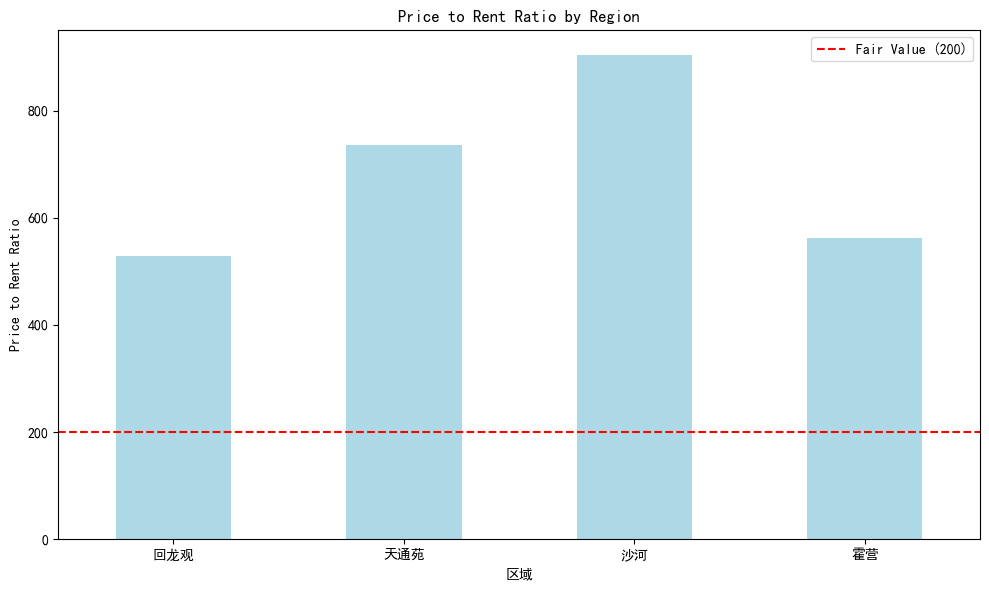

In [ ]:
import matplotlib.pyplot as plt
# 设置中文字体，画图需要
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
# 计算各区域房价单价中位数和租金单价中位数
buy_median = buydf.groupby('区域')['单价(元/㎡)'].median()
rent_median = (rentdf['月租金(元)'] / rentdf['面积(㎡)']).groupby(rentdf['区域']).median()

# 计算价格租金比 (房价单价 / 年租金单价)
price_rent_ratio = (buy_median / rent_median ).round(2)

print("各区域价格租金比:")
print(price_rent_ratio)

# 绘图
plt.figure(figsize=(10, 6))
price_rent_ratio.plot(kind='bar', color='lightblue')
plt.axhline(y=200, color='red', linestyle='--', label='Fair Value (200)')
plt.title('Price to Rent Ratio by Region')
plt.ylabel('Price to Rent Ratio')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

## 建模model

# 一定只用3个虚拟变量或者去掉截距项，否则陷入虚拟变量陷阱

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 买房数据 - 使用drop_first=True避免虚拟变量陷阱
X_buy = pd.get_dummies(buydf[['总面积(㎡)', '区域']], columns=['区域'], drop_first=True)
y_buy = buydf['单价(元/㎡)']

# 租房数据
rentdf['租金单价'] = rentdf['月租金(元)'] / rentdf['面积(㎡)']
X_rent = pd.get_dummies(rentdf[['面积(㎡)', '区域']], columns=['区域'], drop_first=True)
y_rent = rentdf['租金单价']

print("买房模型特征:", X_buy.columns.tolist())
print("租房模型特征:", X_rent.columns.tolist())
X_rent

买房模型特征: ['总面积(㎡)', '区域_天通苑', '区域_沙河', '区域_霍营']
租房模型特征: ['面积(㎡)', '区域_天通苑', '区域_沙河', '区域_霍营']


,面积(㎡),区域_天通苑,区域_沙河,区域_霍营
0,20.0,False,False,False
1,20.0,False,False,False
2,18.0,False,False,False
3,15.0,False,False,False
4,25.0,False,False,False
...,...,...,...,...
6148,125.0,False,False,True
6149,77.0,False,False,True
6150,130.0,False,False,True
6151,75.0,False,False,True


Model 1：房价 = β₀ + β₁ × 总面积 + β₂ × 区域_沙河 + β₃ × 区域_霍营 + β₄ × 区域_天通苑

Model 2：租金 = β₀ + β₁ × 面积 + β₂ × 区域_沙河 + β₃ × 区域_霍营 + β₄ × 区域_天通苑

In [7]:
# 训练模型
model1 = LinearRegression().fit(X_buy, y_buy)
model2 = LinearRegression().fit(X_rent, y_rent)

# 查看系数
print("\n=== 模型系数 ===")
print("房价模型:")
print(f"截距: {model1.intercept_:.2f}")
for col, coef in zip(X_buy.columns, model1.coef_):
    print(f"{col}: {coef:.2f}")

print("\n租金模型:")
print(f"截距: {model2.intercept_:.2f}")
for col, coef in zip(X_rent.columns, model2.coef_):
    print(f"{col}: {coef:.2f}")

# 预测所有数据
buydf['预测房价单价'] = model1.predict(X_buy)
rentdf['预测租金单价'] = model2.predict(X_rent)

# 计算各区域的中位数预测单价
region_buy_median = buydf.groupby('区域')['预测房价单价'].median()
region_rent_median = rentdf.groupby('区域')['预测租金单价'].median()

print("各区域预测房价单价中位数:")
print(region_buy_median.round(2))
print("\n各区域预测租金单价中位数:")
print(region_rent_median.round(2))

# 计算各区域的价格租金比（房价中位数 ÷ 租金中位数）
model_pr_ratio = (region_buy_median / region_rent_median).round(2)

print("\n模型预测各区域价格租金比:")
print(model_pr_ratio)



=== 模型系数 ===
房价模型:
截距: 36432.46
总面积(㎡): 44.05
区域_天通苑: 3264.29
区域_沙河: 3475.90
区域_霍营: 1500.18

租金模型:
截距: 84.95
面积(㎡): -0.04
区域_天通苑: -7.39
区域_沙河: -25.80
区域_霍营: 1.34
各区域预测房价单价中位数:
区域
回龙观    40894.86
天通苑    51625.85
沙河     51848.47
霍营     41854.09
Name: 预测房价单价, dtype: float64

各区域预测租金单价中位数:
区域
回龙观    81.57
天通苑    74.10
沙河     56.04
霍营     83.54
Name: 预测租金单价, dtype: float64

模型预测各区域价格租金比:
区域
回龙观    501.35
天通苑    696.67
沙河     925.17
霍营     501.03
dtype: float64


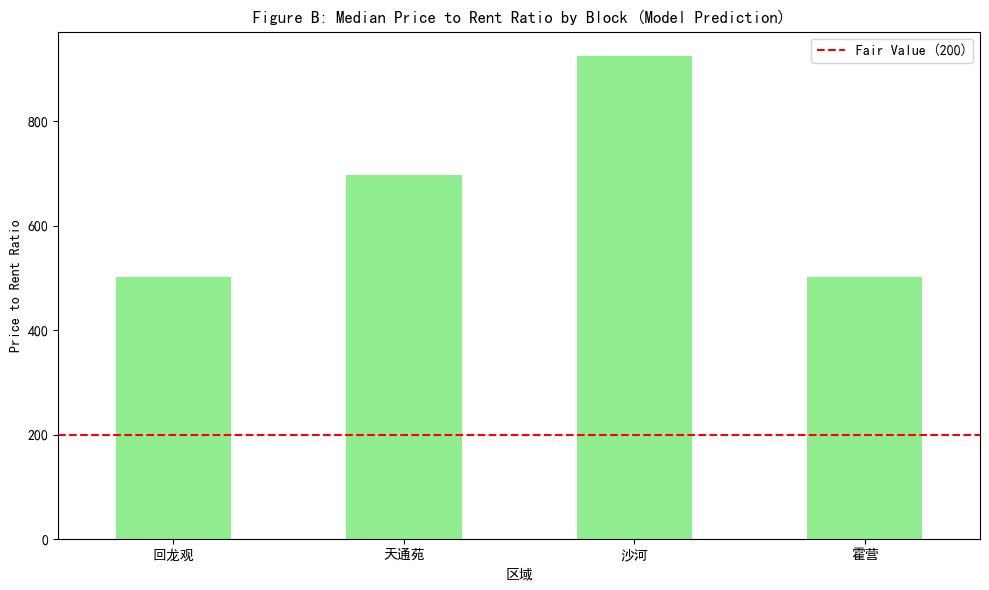

In [9]:
# 设置中文字体，画图需要
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
model_pr_ratio.plot(kind='bar', color='lightgreen')
plt.axhline(y=200, color='red', linestyle='--', label='Fair Value (200)')
plt.title('Figure B: Median Price to Rent Ratio by Block (Model Prediction)')
plt.ylabel('Price to Rent Ratio')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
r1_buy = model1.score(X_buy, y_buy)  # 返回R²分数
r1_rent = model2.score(X_rent, y_rent)
print("=== 模型 R² ===")
print(f"Model 1: {r1_buy:.4f}")
print(f"Model 2: {r1_rent:.4f}")

=== 模型 R² ===
Model 1: 0.2627
Model 2: 0.1295


## Pro模型

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# 基础特征
X_buy_base = pd.get_dummies(buydf[['总面积(㎡)', '区域']], columns=['区域'], drop_first=True)
y_buy = buydf['单价(元/㎡)']

# 租房数据
X_rent_base = pd.get_dummies(rentdf[['面积(㎡)', '区域']], columns=['区域'], drop_first=True)
y_rent = rentdf['租金单价']

In [ ]:
# 创建增强特征（非线性 + 交互）
def create_enhanced_features(df, area_col, region_col): # 参数：df、面积、区域
    # 基础特征矩阵，含原始面积和区域虚拟变量
    X_base = pd.get_dummies(df[[area_col, region_col]], columns=[region_col], drop_first=True)
    
    # 非线性特征（多项式），加入面积^2项
    poly = PolynomialFeatures(degree=2, include_bias=False) # degree=2代表创建特征最高到平方项
    area_poly = poly.fit_transform(df[[area_col]])
    area_poly_df = pd.DataFrame(area_poly, 
                               columns=[f'{area_col}_poly1', f'{area_col}_poly2'])
    
    # 交互特征（面积 × 区域）
    region_dummies = pd.get_dummies(df[region_col], drop_first=True)
    interaction_features = pd.DataFrame()
    for region in region_dummies.columns:
        interaction_features[f'{area_col}_{region}'] = df[area_col] * region_dummies[region]
    
    # 合并所有特征
    X_enhanced = pd.concat([X_base, area_poly_df, interaction_features], axis=1)
    return X_enhanced

# 用刚才的函数，创建增强特征
X_buy_enhanced = create_enhanced_features(buydf, '总面积(㎡)', '区域')
X_rent_enhanced = create_enhanced_features(rentdf, '面积(㎡)', '区域')

X_buy_enhanced


,总面积(㎡),区域_天通苑,区域_沙河,区域_霍营,总面积(㎡)_poly1,总面积(㎡)_poly2,总面积(㎡)_天通苑,总面积(㎡)_沙河,总面积(㎡)_霍营
0,127.00,False,False,False,127.00,16129.0000,0.0,0.0,0.00
1,145.00,False,False,False,145.00,21025.0000,0.0,0.0,0.00
2,108.00,False,False,False,108.00,11664.0000,0.0,0.0,0.00
3,60.00,False,False,False,60.00,3600.0000,0.0,0.0,0.00
4,101.00,False,False,False,101.00,10201.0000,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...
4051,95.92,False,False,True,95.92,9200.6464,0.0,0.0,95.92
4052,66.18,False,False,True,66.18,4379.7924,0.0,0.0,66.18
4053,103.59,False,False,True,103.59,10730.8881,0.0,0.0,103.59
4054,45.78,False,False,True,45.78,2095.8084,0.0,0.0,45.78


In [ ]:
X_rent_enhanced

,面积(㎡),区域_天通苑,区域_沙河,区域_霍营,面积(㎡)_poly1,面积(㎡)_poly2,面积(㎡)_天通苑,面积(㎡)_沙河,面积(㎡)_霍营
0,20.0,False,False,False,20.0,400.0,0.0,0.0,0.0
1,20.0,False,False,False,20.0,400.0,0.0,0.0,0.0
2,18.0,False,False,False,18.0,324.0,0.0,0.0,0.0
3,15.0,False,False,False,15.0,225.0,0.0,0.0,0.0
4,25.0,False,False,False,25.0,625.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6148,125.0,False,False,True,125.0,15625.0,0.0,0.0,125.0
6149,77.0,False,False,True,77.0,5929.0,0.0,0.0,77.0
6150,130.0,False,False,True,130.0,16900.0,0.0,0.0,130.0
6151,75.0,False,False,True,75.0,5625.0,0.0,0.0,75.0


Model 1+:房价 = β₀ + β₁ × 总面积 + β₂ × 区域_沙河 + β₃ × 区域_霍营 + β₄ × 区域_天通苑
     + β₅ × 总面积² + β₆ × (总面积 × 区域_沙河) + β₇ × (总面积 × 区域_霍营) + β₈ × (总面积 × 区域_天通苑)

Model 2+:租金 = β₀ + β₁ × 面积 + β₂ × 区域_沙河 + β₃ × 区域_霍营 + β₄ × 区域_天通苑
     + β₅ × 面积² + β₆ × (面积 × 区域_沙河) + β₇ × (面积 × 区域_霍营) + β₈ × (面积 × 区域_天通苑)

In [ ]:
# 尝试标准化特征，但发现标准化后反而R^2略有下降，因此去掉标准化
#scaler_buy = StandardScaler()
#scaler_rent = StandardScaler()

X_buy_enhanced_scaled = X_buy_enhanced
X_rent_enhanced_scaled = X_rent_enhanced

# 训练模型
model1_plus = LinearRegression().fit(X_buy_enhanced_scaled, y_buy)
model2_plus = LinearRegression().fit(X_rent_enhanced_scaled, y_rent)

print("=== 模型 R² ===")
r2_buy = model1_plus.score(X_buy_enhanced_scaled, y_buy)  # 返回R²分数
r2_rent = model2_plus.score(X_rent_enhanced_scaled, y_rent)
print(f"Model 1_plus: {r2_buy:.4f}")
print(f"Model 2_plus: {r2_rent:.4f}")

# 增强模型预测
buydf['预测房价单价_plus'] = model1_plus.predict(X_buy_enhanced_scaled)
rentdf['预测租金单价_plus'] = model2_plus.predict(X_rent_enhanced_scaled)

# 计算各区域预测单价中位数
region_buy_median_plus = buydf.groupby('区域')['预测房价单价_plus'].median()
region_rent_median_plus = rentdf.groupby('区域')['预测租金单价_plus'].median()

# 计算各区域的价格租金比
model_pr_ratio_plus = (region_buy_median_plus / region_rent_median_plus ).round(2)

print("\n增强模型预测各区域价格租金比:")
print(model_pr_ratio_plus)


=== 模型 R² ===
Model 1_plus: 0.3055
Model 2_plus: 0.4343

增强模型预测各区域价格租金比:
区域
回龙观    518.28
天通苑    734.24
沙河     973.36
霍营     515.09
dtype: float64


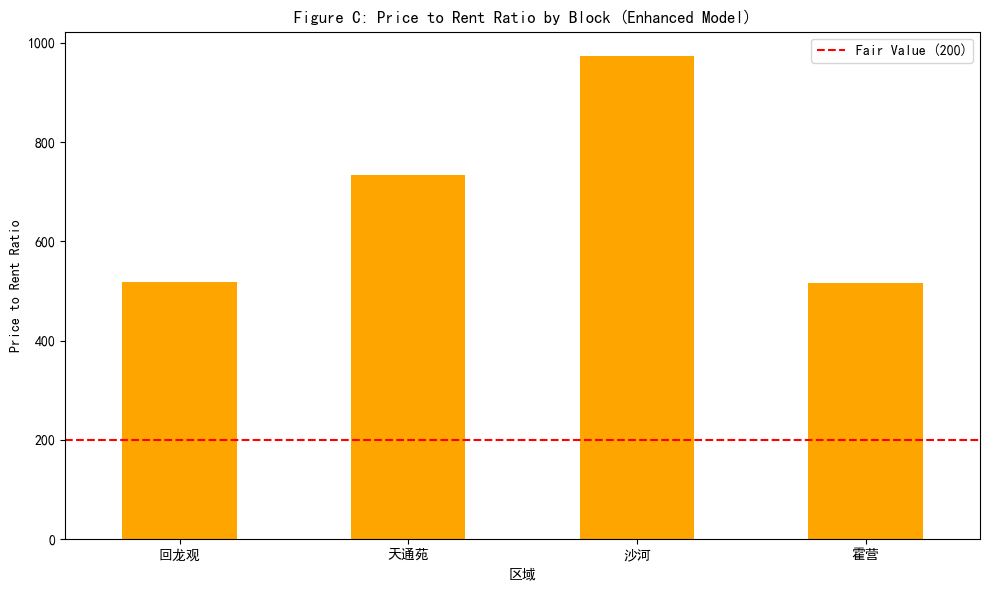

In [ ]:
# 绘图
plt.figure(figsize=(10, 6))
model_pr_ratio_plus.plot(kind='bar', color='orange')
plt.axhline(y=200, color='red', linestyle='--', label='Fair Value (200)')
plt.title('Figure C: Price to Rent Ratio by Block (Enhanced Model)')
plt.ylabel('Price to Rent Ratio')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("\n===样本量===")
buy_sample_sizes = buydf.groupby('区域').size()
rent_sample_sizes = rentdf.groupby('区域').size()

print("买房数据样本量:")
print(buy_sample_sizes)
print("\n租房数据样本量:")
print(rent_sample_sizes)

# 根据样本量选择模型
min_samples = min(min(buy_sample_sizes), min(rent_sample_sizes))
print(f"\n最小样本量: {min_samples}")
if min_samples < 30:
    print("样本量较小，所有模型都可能存在过拟合风险")
elif min_samples < 100:
    print(" 样本量中等，增强模型可能更准确")
else:
    print("样本量充足，增强模型应该最准确")


===样本量===
买房数据样本量:
区域
回龙观    1200
天通苑    1200
沙河     1200
霍营      456
dtype: int64

租房数据样本量:
区域
回龙观    2590
天通苑    1720
沙河     1200
霍营      643
dtype: int64

最小样本量: 456
样本量充足，增强模型应该最准确


R² 比较、分析：
Model 1+ 和 Model 2+有更高的R²值，由于其捕捉了非线性关系。基础模型假设面积与价格/租金呈严格的线性关系，但增强模型通过 面积² 捕捉边际效应递减/递增的非线性模式。现实中，房屋面积对价格的影响也不是线性的。

其次，加入交互项，基础模型假设面积对价格的影响在所有区域相同，但增强模型通过 面积 × 区域 交互项捕捉不同区域的差异化面积效应。
在样本量充足的情况下，应信任增强模型的结果，因为它更好地反映了不同区域、不同面积房屋的价值规律差异。